In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word
from ast import literal_eval
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Load label data

In [2]:
label_data = pd.read_csv('new_golden.csv', encoding='ISO-8859-1')

label_data['new_HLC1'] = label_data['new_HLC'].apply(literal_eval)
label_data['new_LLC1'] = label_data['new_LLC'].apply(literal_eval)

label_data.head()
label_data.shape

(1584, 20)

In [3]:
# Data Cleaning
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    
    return text

# creating clean text feature
features = ['reviewText']
for feature in features:
    label_data['clean_' + feature] = label_data[feature].apply(clean_text)

label_data.head()

,Unnamed: 0,_id,new_HLC,new_LLC,app,appVersion,reviewText,author,date,ratingStars,...,classification,class1,class2,class3,copied to 30each,class4,class5,new_HLC1,new_LLC1,clean_reviewText
0,0,578945a6819cb706b00a7328,"['USAGE', 'PRICING']","['APP USABILITY', 'LICENSING']",2048,2.06,Fundamental flaw Sometimes drops a 4 instead o...,Larry H,15/01/16,4,...,OTHER,LICENSING,APP USABILITY,ERROR,NaN,NaN,NaN,"[USAGE, PRICING]","[APP USABILITY, LICENSING]",fundamental flaw sometimes drops a instead of ...
1,1,578945a5819cb706b00a7327,"['USAGE', 'RESSOURCES']","['PERFORMANCE', 'APP USABILITY', 'UI']",2048,2.06,Too easy and too slow Being able to undo just ...,JÐ_hann G. ÐÐ¢lafsson,18/01/16,2,...,USAGE,APP USABILITY,PERFORMANCE,UI,y,ERROR,NaN,"[USAGE, RESSOURCES]","[PERFORMANCE, APP USABILITY, UI]",too easy and too slow being able to undo just ...
2,2,578945a5819cb706b00a7326,"['USAGE', 'RESSOURCES']","['PERFORMANCE', 'UI']",2048,2.06,"Slow Since latest update, it's moving very slo...",Zachary Burris,15/02/16,4,...,RESSOURCES,PERFORMANCE,PERFORMANCE,UI,y,ERROR,NaN,"[USAGE, RESSOURCES]","[PERFORMANCE, UI]",slow since latest update it s moving very slow...
3,3,578945a5819cb706b00a7325,[],['OTHER'],2048,2.06,love it.. good excercise before i go to work..,ahmir Cruz,20/02/16,5,...,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,[],[OTHER],love it good excercise before i go to work
4,4,578945a2819cb706b00a7324,['COMPATIBILITY'],['ANDROID VERSION'],2048,2.06,Keeps crashing Since I upgraded my android thi...,Astrid Elkesdottir,26/02/16,1,...,RESSOURCES,ANDROID VERSION,ERROR,NaN,y,NaN,NaN,[COMPATIBILITY],[ANDROID VERSION],keeps crashing since i upgraded my android thi...


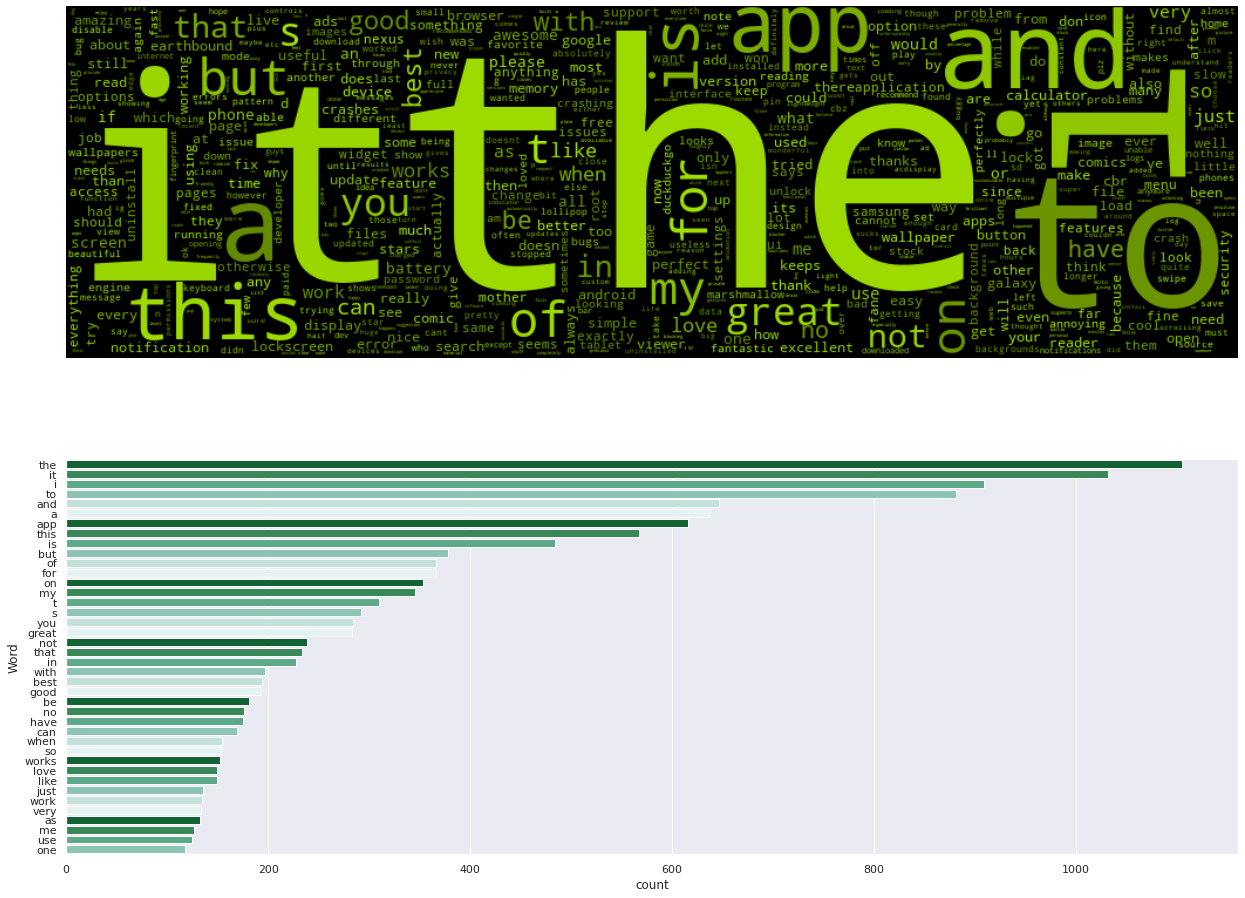

In [4]:
label_data['soup'] = label_data['clean_reviewText']

def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 40):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 40 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

from itertools import count
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline
word = freq_words(label_data['soup'])

# Stop Word removing 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


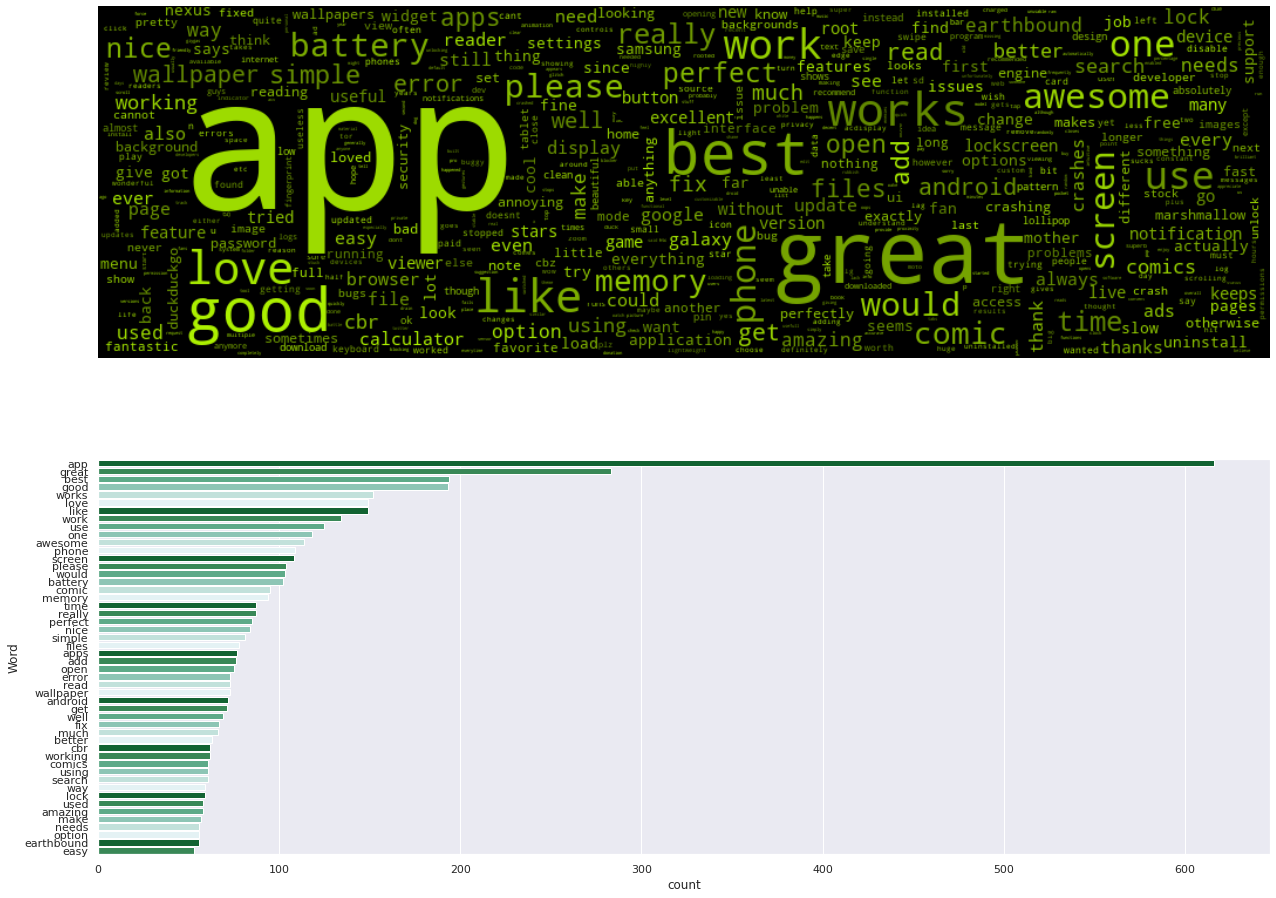

In [5]:
# stopwords-to compare text data with and without stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
label_data['soup'] = label_data['soup'].apply(lambda x: remove_stopwords(x))

# plot 50 most frequent words without stopwords
freq_words(label_data['soup'], 50)

In [6]:
#total words count of user reviews
wordcounts = []
sentences = label_data['soup']
for sentence in sentences:

  words = sentence.split(' ')
  wordcounts.append(len(words))
print(sum(wordcounts))

18265


# Stemming Process

In [7]:
# stemming process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
stemming process. 
'''
stem_process = PorterStemmer()

def tokenize_and_stem(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [stem_process.stem(t) for t in filtered_tokens]
    return lem

In [8]:
# Defining a TF-IDF Vectorizer with Ngram 2 and 3
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), tokenizer=tokenize_and_stem, max_features=10000, use_idf=True)

In [9]:
label_data.head()

,Unnamed: 0,_id,new_HLC,new_LLC,app,appVersion,reviewText,author,date,ratingStars,...,class1,class2,class3,copied to 30each,class4,class5,new_HLC1,new_LLC1,clean_reviewText,soup
0,0,578945a6819cb706b00a7328,"['USAGE', 'PRICING']","['APP USABILITY', 'LICENSING']",2048,2.06,Fundamental flaw Sometimes drops a 4 instead o...,Larry H,15/01/16,4,...,LICENSING,APP USABILITY,ERROR,NaN,NaN,NaN,"[USAGE, PRICING]","[APP USABILITY, LICENSING]",fundamental flaw sometimes drops a instead of ...,fundamental flaw sometimes drops instead suspe...
1,1,578945a5819cb706b00a7327,"['USAGE', 'RESSOURCES']","['PERFORMANCE', 'APP USABILITY', 'UI']",2048,2.06,Too easy and too slow Being able to undo just ...,JÐ_hann G. ÐÐ¢lafsson,18/01/16,2,...,APP USABILITY,PERFORMANCE,UI,y,ERROR,NaN,"[USAGE, RESSOURCES]","[PERFORMANCE, APP USABILITY, UI]",too easy and too slow being able to undo just ...,easy slow able undo one move enough correct fa...
2,2,578945a5819cb706b00a7326,"['USAGE', 'RESSOURCES']","['PERFORMANCE', 'UI']",2048,2.06,"Slow Since latest update, it's moving very slo...",Zachary Burris,15/02/16,4,...,PERFORMANCE,PERFORMANCE,UI,y,ERROR,NaN,"[USAGE, RESSOURCES]","[PERFORMANCE, UI]",slow since latest update it s moving very slow...,slow since latest update moving slow animation...
3,3,578945a5819cb706b00a7325,[],['OTHER'],2048,2.06,love it.. good excercise before i go to work..,ahmir Cruz,20/02/16,5,...,OTHER,NaN,NaN,NaN,NaN,NaN,[],[OTHER],love it good excercise before i go to work,love good excercise go work
4,4,578945a2819cb706b00a7324,['COMPATIBILITY'],['ANDROID VERSION'],2048,2.06,Keeps crashing Since I upgraded my android thi...,Astrid Elkesdottir,26/02/16,1,...,ANDROID VERSION,ERROR,NaN,y,NaN,NaN,[COMPATIBILITY],[ANDROID VERSION],keeps crashing since i upgraded my android thi...,keeps crashing since upgraded android game kee...


# Drop Null Value

In [10]:
def drop_null_values():
  df1 = label_data
  df2 = label_data
  # drop those rows with empty HLC
  for index, row in df1.iterrows():
    if row['new_HLC1'] == ['']:
      df1 = df1.drop(index)

  # drop those rows with empty LLC
  for index, row in df2.iterrows():
    if row['new_LLC1'] == ['']:
      df2 = df2.drop(index)

  return df1, df2


df1, df2 = drop_null_values()
print(df1.shape)
print(df2.shape)

(1584, 22)
(1584, 22)


# Categories HLC and LLC

In [11]:
HLC_categories = ['USAGE', 'COMPATIBILITY', 'RESSOURCES', 'PRICING', 'PROTECTION']
LLC_categories = ['APP USABILITY', 'UI', 'DEVICE', 'ANDROID VERSION', 'HARDWARE', 'PERFORMANCE', 'BATTERY', 'MEMORY', 'LICENSING', 'PRICE', 'PRIVACY', 'SECURITY']

for cat in HLC_categories:
  df1[cat] = np.nan
  for index, row in df1.iterrows():
    if cat in row['new_HLC1']:
      df1.at[index,cat] = 1
    else:
      df1.at[index,cat] = 0

for cat in LLC_categories:
  df2[cat] = np.nan
  for index, row in df2.iterrows():
    if cat in row['new_LLC1']:
      df2.at[index,cat] = 1
    else:
      df2.at[index,cat] = 0



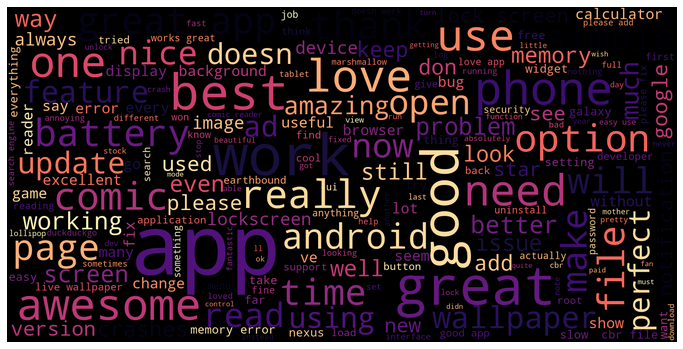

In [12]:
text = " ".join(review for review in label_data.clean_reviewText)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

# User Review classification using GBRT for HLC

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
import collections
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

def get_performance(y_test, y_pred1):
    # Evaluate Performance
    accuracy = round(accuracy_score(y_test, y_pred1) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred1, average='weighted')
    return accuracy, precision, recall, f1score

def classification():
  for cat in HLC_categories:
    X_train, X_test, y_train, y_test = train_test_split(df1['soup'], df1[cat], test_size=0.2, random_state=55)
    xtrain_tfidf = tfidf_vec.fit_transform(X_train)
    xtest_tfidf = tfidf_vec.transform(X_test)
    
    gb_clf2 = GradientBoostingClassifier(n_estimators=60, learning_rate=1.0, max_depth=2)
    oneVsRest = OneVsRestClassifier(gb_clf2)

    oneVsRest.fit(xtrain_tfidf, y_train)
    y_pred1 = oneVsRest.predict(xtest_tfidf)

    # Performance metrics
    accuracy, precision, recall, f1score = get_performance(y_test, y_pred1)
    print('Performance for ', cat, ' category:')
    print('Accuracy : ', accuracy)
    print('Precision : ', 100 * precision)
    print('Recall : ', 100 * recall)
    print('F1-score : ', 100 * f1score)


In [16]:
classification()

Performance for  USAGE  category:
Accuracy :  73.19
Precision :  70.25021562164014
Recall :  73.18611987381703
F1-score :  70.5633696257538
Performance for  COMPATIBILITY  category:
Accuracy :  81.7
Precision :  79.6663212199205
Recall :  81.70347003154575
F1-score :  79.9100387242462
Performance for  RESSOURCES  category:
Accuracy :  88.96
Precision :  87.65988199954779
Recall :  88.95899053627761
F1-score :  87.48402382377111
Performance for  PRICING  category:
Accuracy :  95.58
Precision :  94.411027823141
Recall :  95.58359621451105
F1-score :  94.72908681757927
Performance for  PROTECTION  category:
Accuracy :  92.11
Precision :  90.74497271858529
Recall :  92.11356466876973
F1-score :  90.31842778363468


# User Review classification using GBRT for LLC

In [17]:
for cat in LLC_categories:
    X_train, X_test, y_train, y_test = train_test_split(df2['soup'], df2[cat], test_size=0.2, random_state=55)
    xtrain_tfidf = tfidf_vec.fit_transform(X_train)
    xtest_tfidf = tfidf_vec.transform(X_test)
    
    gb_clf2 = GradientBoostingClassifier(n_estimators=60, learning_rate=1.0, max_depth=2)
    oneVsRest = OneVsRestClassifier(gb_clf2)

    oneVsRest.fit(xtrain_tfidf, y_train)
    y_pred1 = oneVsRest.predict(xtest_tfidf)

    # Performance metrics
    accuracy, precision, recall, f1score = get_performance(y_test, y_pred1)
    print('Performance for ', cat, ' category:')
    print('Accuracy : ', accuracy)
    print('Precision : ', 100 * precision)
    print('Recall : ', 100 * recall)
    print('F1-score : ', 100 * f1score)

Performance for  APP USABILITY  category:
Accuracy :  88.64
Precision :  87.22577321090928
Recall :  88.64353312302839
F1-score :  87.84801006661881
Performance for  UI  category:
Accuracy :  77.92
Precision :  71.7773279788116
Recall :  77.91798107255521
F1-score :  74.02006371592998
Performance for  DEVICE  category:
Accuracy :  83.91
Precision :  80.40837786218589
Recall :  83.91167192429022
F1-score :  81.55774545657576
Performance for  ANDROID VERSION  category:
Accuracy :  91.48
Precision :  89.52086673217148
Recall :  91.48264984227129
F1-score :  90.38496683903657
Performance for  HARDWARE  category:
Accuracy :  97.79
Precision :  97.92892876489093
Recall :  97.79179810725552
F1-score :  97.85495575506022
Performance for  PERFORMANCE  category:
Accuracy :  95.9
Precision :  94.29622953282258
Recall :  95.89905362776025
F1-score :  94.43181142543602
Performance for  BATTERY  category:
Accuracy :  96.85
Precision :  96.55817063774731
Recall :  96.84542586750788
F1-score :  96.292

In [18]:
# for reviews.csv
label_data2 = pd.read_csv('reviews.csv', encoding='ISO-8859-1')

# change name of columns (remove 'IS_')
for col in label_data2.columns[15:]:
    label_data2 = label_data2.rename(columns = {col:col[3:]})

# Data Cleaning
label_data2['clean_reviewText'] = label_data2['reviewText'].apply(clean_text)
label_data2['soup'] = label_data2['clean_reviewText']

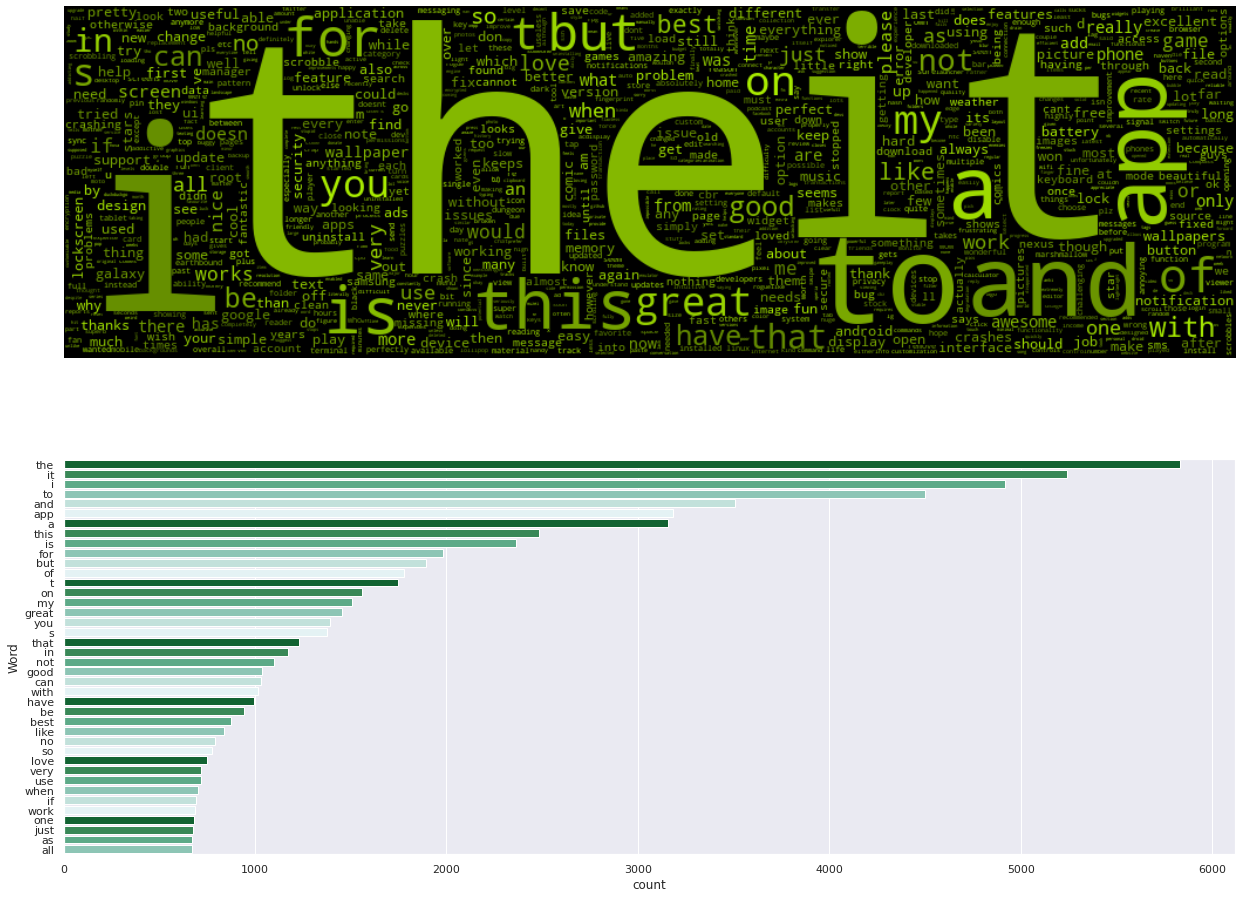

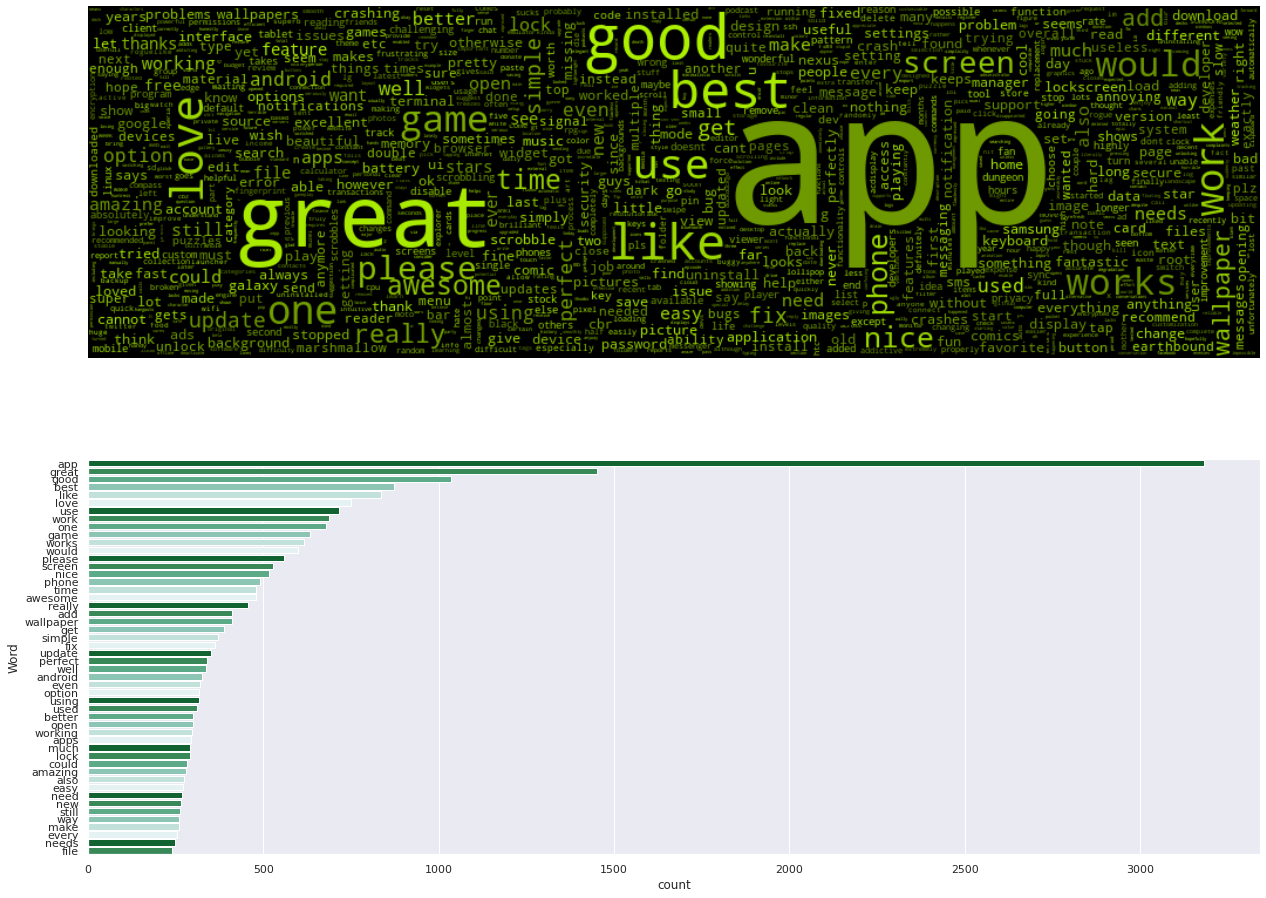

91992


In [19]:

sns.set()
%matplotlib inline
word = freq_words(label_data2['soup'])

label_data2['soup'] = label_data2['soup'].apply(lambda x: remove_stopwords(x))

# # plot 50 most frequent words without stopwords
freq_words(label_data2['soup'], 50)


# total words count of user reviews
wordcounts = []
sentences = label_data2['soup']
for sentence in sentences:
  words = sentence.split(' ')
  wordcounts.append(len(words))
print(sum(wordcounts))


In [23]:
df3 = label_data2
for index, row in df3.iterrows():
    if row['subclasses'] == '[]':
      df3 = df3.drop(index)

print(df3.shape)

(4418, 35)


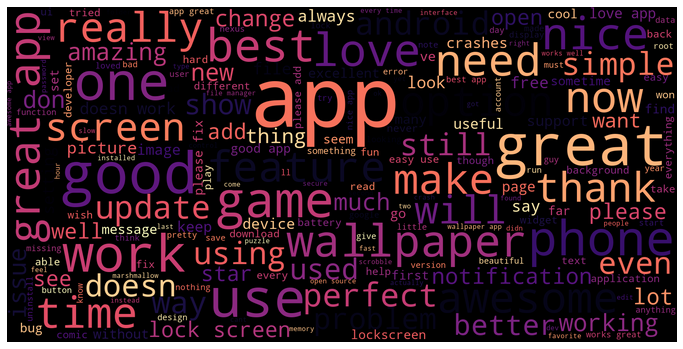

In [21]:
text = " ".join(review for review in label_data2.clean_reviewText)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [25]:
df1 = df3
df2 = df3
classification()

Performance for  USAGE  category:
Accuracy :  59.16
Precision :  62.439278750226144
Recall :  59.16289592760181
F1-score :  53.582225945277074
Performance for  COMPATIBILITY  category:
Accuracy :  83.6
Precision :  82.24418959041574
Recall :  83.5972850678733
F1-score :  80.99810443232911
Performance for  RESSOURCES  category:
Accuracy :  89.59
Precision :  88.42159888924243
Recall :  89.59276018099548
F1-score :  87.54270221291732
Performance for  PRICING  category:
Accuracy :  94.91
Precision :  94.56973696697297
Recall :  94.90950226244344
F1-score :  94.41598275898764
Performance for  PROTECTION  category:
Accuracy :  89.71
Precision :  88.95445849306839
Recall :  89.70588235294117
F1-score :  88.75028268286806
